#### Problem Statement: Develop a predictive model to estimate the price of a vehicle based on the provided features.

## 1.Data Cleaning & Preprocessing:

In [147]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import ast
import seaborn as sns

In [148]:
df=pd.read_csv("vehicles.csv")  # read the file

In [149]:
df.head() # checked data 

,ad_title,ad_description,details,slug,title,type,price,timestamp,posted_date,deactivation_date,...,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,member_since,properties,user
0,Nissan Tiida Alternator in Maharagama | ikman,**TISSA AUTO PARTS** Dealer of used Japanese m...,NaN,nissan-tiida-alternator-for-sale-colombo-3,Nissan Tiida Alternator,for_sale,"Rs 18,000",23 Feb 11:35 pm,2023-02-23T23:35:10+05:30,2022-05-30T17:13:04.000Z,...,False,False,True,False,False,True,premium,September 2019,"{'Condition': 'Reconditioned', 'Part or Access...",a6681dea494390daa516a6d2bdcb36e08c318574a13413...
1,Axio 165 Tail Light in Kotte | ikman,Imported from Japan \n\nRight side available \...,NaN,axio-165-tail-light-for-sale-colombo-14,Axio 165 Tail Light,for_sale,"Rs 67,000",23 Feb 8:32 am,2023-02-23T08:32:44+05:30,2022-03-31T16:27:59.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
2,Axio 165 / 161 Head light in Kotte | ikman.lk,Imported from Japan \n\nAuto focus headlight a...,NaN,axio-165-161-head-light-for-sale-colombo,Axio 165 / 161 Head light,for_sale,"Rs 85,000",01 Dec 8:27 pm,2022-12-01T20:27:49+05:30,2022-03-31T14:03:57.000Z,...,False,False,True,False,False,True,plus,June 2018,"{'Condition': 'Reconditioned', 'Part or Access...",5d99b8e45a1bb318079da7a36392d9025e1644cb49ecbf...
3,Vigo side step ( Foot board) in Kottawa | ikman,Hilux Vigo side step\nBrand New Thaiwan\nGood ...,NaN,vigo-side-step-foot-board-for-sale-colombo,Vigo side step ( Foot board),for_sale,"Rs 47,000",04 Dec 2:47 pm,2022-12-04T14:47:27+05:30,2022-07-29T13:22:59.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...
4,Vigo Dickey Door Garnish Cover in Kottawa | i...,"Hilux Vigo ( 2005, 2009 ) dickey door garnish set",NaN,vigo-dickey-door-garnish-cover-for-sale-colombo-1,Vigo Dickey Door Garnish Cover,for_sale,"Rs 9,000",08 Dec 9:28 am,2022-12-08T09:28:04+05:30,2022-07-29T12:55:44.000Z,...,False,False,True,False,False,False,plus,February 2017,"{'Condition': 'New', 'Part or Accessory Type':...",634d93e14a62d9de7b400ee3679ae1d5506f4252ff0580...


In [150]:
df.columns # check all column names 

Index(['ad_title', 'ad_description', 'details', 'slug', 'title', 'type',
       'price', 'timestamp', 'posted_date', 'deactivation_date', 'category',
       'parent_category', 'location', 'geo_region', 'area', 'is_delivery_free',
       'is_doorstep_delivery', 'is_dsd_applicable', 'is_member',
       'is_authorized_dealer', 'is_featured_member', 'is_verified',
       'membership_level', 'member_since', 'properties', 'user'],
      dtype='object')

In [151]:
df.shape # checked shape of data 

(258888, 26)

In [152]:
df.info()   # checked all data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258888 entries, 0 to 258887
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ad_title              258888 non-null  object
 1   ad_description        258881 non-null  object
 2   details               155505 non-null  object
 3   slug                  258888 non-null  object
 4   title                 258888 non-null  object
 5   type                  258888 non-null  object
 6   price                 255077 non-null  object
 7   timestamp             258882 non-null  object
 8   posted_date           258882 non-null  object
 9   deactivation_date     258882 non-null  object
 10  category              258888 non-null  object
 11  parent_category       258888 non-null  object
 12  location              258888 non-null  object
 13  geo_region            258888 non-null  object
 14  area                  258888 non-null  object
 15  is_delivery_free 

## Handle missing values appropriately.

In [153]:
df.isnull().sum()  #checked all null values

ad_title                     0
ad_description               7
details                 103383
slug                         0
title                        0
type                         0
price                     3811
timestamp                    6
posted_date                  6
deactivation_date            6
category                     0
parent_category              0
location                     0
geo_region                   0
area                         0
is_delivery_free             0
is_doorstep_delivery         0
is_dsd_applicable            0
is_member                 9050
is_authorized_dealer      9050
is_featured_member        9050
is_verified                  0
membership_level             0
member_since            150254
properties                   0
user                         0
dtype: int64

### There are approx 40 percent null values in the details column so we can drop that column


In [154]:
df['details'].isna().mean()

0.39933484750162235

### There are 58 percent null values in the member since column So i decided to drop this column

In [155]:
df['member_since'].isna().mean()

0.5803822502394858

In [156]:
df=df.drop(['details','member_since'],axis=1)   # deleted this columns because it contains null values more than 45% of data 

In [157]:
df.shape   # check shape

(258888, 24)

In [158]:
df=df.dropna() # droped all null values 

In [159]:
df.shape # check shape after deleted null values

(246050, 24)

In [160]:
df.isnull().sum()    # no null values 

ad_title                0
ad_description          0
slug                    0
title                   0
type                    0
price                   0
timestamp               0
posted_date             0
deactivation_date       0
category                0
parent_category         0
location                0
geo_region              0
area                    0
is_delivery_free        0
is_doorstep_delivery    0
is_dsd_applicable       0
is_member               0
is_authorized_dealer    0
is_featured_member      0
is_verified             0
membership_level        0
properties              0
user                    0
dtype: int64

In [161]:
df['category'].unique()    # check all unique categories  

array(['Auto Parts & Accessories', 'Cars', 'Auto Services', 'Rentals',
       'Vans', 'Lorries & Trucks', 'Three Wheelers', 'Motorbikes',
       'Buses', 'Heavy Duty', 'Tractors', 'Bicycles',
       'Boats & Water Transport'], dtype=object)

In [162]:
df1=df.drop(df[(df['category']=='Auto Parts & Accessories') | (df['category']=='Auto Services') | (df['category']=='Rentals')].index)
# in this we can see there are 3 categories in that auto parts and accessories , auto services and rentals are not vehicals so 
# we need to drop those data 

In [163]:
df1['category'].unique()  # after cleaning that data 

array(['Cars', 'Vans', 'Lorries & Trucks', 'Three Wheelers', 'Motorbikes',
       'Buses', 'Heavy Duty', 'Tractors', 'Bicycles',
       'Boats & Water Transport'], dtype=object)

In [164]:
df1.dtypes

ad_title                object
ad_description          object
slug                    object
title                   object
type                    object
price                   object
timestamp               object
posted_date             object
deactivation_date       object
category                object
parent_category         object
location                object
geo_region              object
area                    object
is_delivery_free          bool
is_doorstep_delivery      bool
is_dsd_applicable         bool
is_member               object
is_authorized_dealer    object
is_featured_member      object
is_verified               bool
membership_level        object
properties              object
user                    object
dtype: object

In [165]:
df1['price'].head()   # in this we can see our value are in Rs 9000 these types of forms so we need to convert  these into float

31      Rs 22,000,000
1349    Rs 14,500,000
1701    Rs 10,500,000
1702     Rs 6,500,000
1917    Rs 11,500,000
Name: price, dtype: object

In [166]:
df1['price'] = df1['price'].str.replace('Rs ', '').str.replace(',', '')
df1['price'] = df1['price'].apply(lambda x: np.nan if x == 'Negotiable' else float(x))    # in these we converted data onto float 

In [167]:
df=df.dropna()  # again droped null values 

In [168]:
df.shape

(246050, 24)

In [169]:
df2=df1.drop(['ad_title','ad_description','parent_category','geo_region','location','slug','title','area','type','timestamp','posted_date','deactivation_date','user'],axis=1)

# droped all irrelevant columns and not related data 

In [170]:
df2['properties'].unique()   # checked properties column

array(["{'Brand': 'Ssang Yong', 'Model': 'Rexton', 'Trim / Edition': 'Rexton Ultimate d/ca', 'Year of Manufacture': '2019', 'Condition': 'New', 'Transmission': 'Tiptronic', 'Body type': 'SUV / 4x4', 'Fuel type': 'Diesel', 'Engine capacity': '2,200 cc', 'Mileage': '0 km'}",
       "{'Brand': 'Toyota', 'Model': 'CHR', 'Year of Manufacture': '2017', 'Condition': 'Reconditioned', 'Transmission': 'Tiptronic', 'Body type': 'CoupÃ©/Sports', 'Fuel type': 'Petrol', 'Engine capacity': '1,200 cc', 'Mileage': '9,000 km'}",
       "{'Brand': 'Toyota', 'Model': 'Axio', 'Trim / Edition': 'Axio', 'Year of Manufacture': '2015', 'Condition': 'Reconditioned', 'Transmission': 'Automatic', 'Body type': 'Saloon', 'Fuel type': 'Hybrid', 'Engine capacity': '1,500 cc', 'Mileage': '24,000 km'}",
       ...,
       "{'Brand': 'Toyota', 'Model': 'Allion', 'Trim / Edition': '260', 'Year of Manufacture': '2009', 'Condition': 'Used', 'Transmission': 'Automatic', 'Body type': 'Saloon', 'Fuel type': 'Petrol', 'Engine 

In [171]:
Condition = []
Brand = []
Model = []
Mileage = []


for i in range(df2.shape[0]):
    dict_converted = ast.literal_eval(df2.iloc[i][-1])
    Condition.append(dict_converted['Condition'])

    if 'Brand' not in dict_converted:
        Brand.append('NaN')
    else:
        Brand.append(dict_converted['Brand'])

    if 'Model' not in dict_converted:
        Model.append('NaN')
    else:
        Model.append(dict_converted['Model'])

    if 'Mileage' not in dict_converted:
        Mileage.append(0)
    else:
        Mileage.append(dict_converted['Mileage'])

# In this we collected all relevant data present in the "properties" column

C:\Users\Diksha\AppData\Local\Temp\ipykernel_7704\281178508.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dict_converted = ast.literal_eval(df2.iloc[i][-1])


In [172]:

df2['Condition']=Condition
df2['Brand']=Brand
df2['Mileage']=Mileage
df2['Model']=Model

#created new columns with all those values 


In [173]:
df2

,price,category,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,properties,Condition,Brand,Mileage,Model
31,22000000.0,Cars,False,False,False,True,False,False,True,plus,"{'Brand': 'Ssang Yong', 'Model': 'Rexton', 'Tr...",New,Ssang Yong,0 km,Rexton
1349,14500000.0,Cars,False,False,False,True,False,False,True,premium,"{'Brand': 'Toyota', 'Model': 'CHR', 'Year of M...",Reconditioned,Toyota,"9,000 km",CHR
1701,10500000.0,Cars,False,False,False,True,False,False,True,premium,"{'Brand': 'Toyota', 'Model': 'Axio', 'Trim / E...",Reconditioned,Toyota,"24,000 km",Axio
1702,6500000.0,Cars,False,False,False,True,False,False,True,plus,"{'Brand': 'Daihatsu', 'Model': 'Atrai Wagon', ...",Reconditioned,Daihatsu,"55,000 km",Atrai Wagon
1917,11500000.0,Cars,False,False,False,True,False,False,True,plus,"{'Brand': 'Mercedes Benz', 'Model': 'C180', 'Y...",Used,Mercedes Benz,"137,000 km",C180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258881,12985000.0,Cars,False,False,False,False,False,False,False,free,"{'Brand': 'Toyota', 'Model': 'CHR', 'Trim / Ed...",Used,Toyota,"43,000 km",CHR
258883,1030000.0,Cars,False,False,False,False,False,False,False,free,"{'Brand': 'Nissan', 'Model': 'March', 'Trim / ...",Used,Nissan,"140,000 km",March
258884,3550000.0,Cars,False,False,False,False,False,False,False,free,"{'Brand': 'Toyota', 'Model': 'Allion', 'Trim /...",Used,Toyota,"219,000 km",Allion
258886,7250000.0,Cars,False,False,False,True,False,False,False,premium,"{'Brand': 'Toyota', 'Model': 'Roomy', 'Trim / ...",Used,Toyota,"30,000 km",Roomy


In [174]:
df2=df2.drop(['properties'],axis=1)   # droped properties column because we collected data from proeprties

In [175]:
df2

,price,category,is_delivery_free,is_doorstep_delivery,is_dsd_applicable,is_member,is_authorized_dealer,is_featured_member,is_verified,membership_level,Condition,Brand,Mileage,Model
31,22000000.0,Cars,False,False,False,True,False,False,True,plus,New,Ssang Yong,0 km,Rexton
1349,14500000.0,Cars,False,False,False,True,False,False,True,premium,Reconditioned,Toyota,"9,000 km",CHR
1701,10500000.0,Cars,False,False,False,True,False,False,True,premium,Reconditioned,Toyota,"24,000 km",Axio
1702,6500000.0,Cars,False,False,False,True,False,False,True,plus,Reconditioned,Daihatsu,"55,000 km",Atrai Wagon
1917,11500000.0,Cars,False,False,False,True,False,False,True,plus,Used,Mercedes Benz,"137,000 km",C180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258881,12985000.0,Cars,False,False,False,False,False,False,False,free,Used,Toyota,"43,000 km",CHR
258883,1030000.0,Cars,False,False,False,False,False,False,False,free,Used,Nissan,"140,000 km",March
258884,3550000.0,Cars,False,False,False,False,False,False,False,free,Used,Toyota,"219,000 km",Allion
258886,7250000.0,Cars,False,False,False,True,False,False,False,premium,Used,Toyota,"30,000 km",Roomy


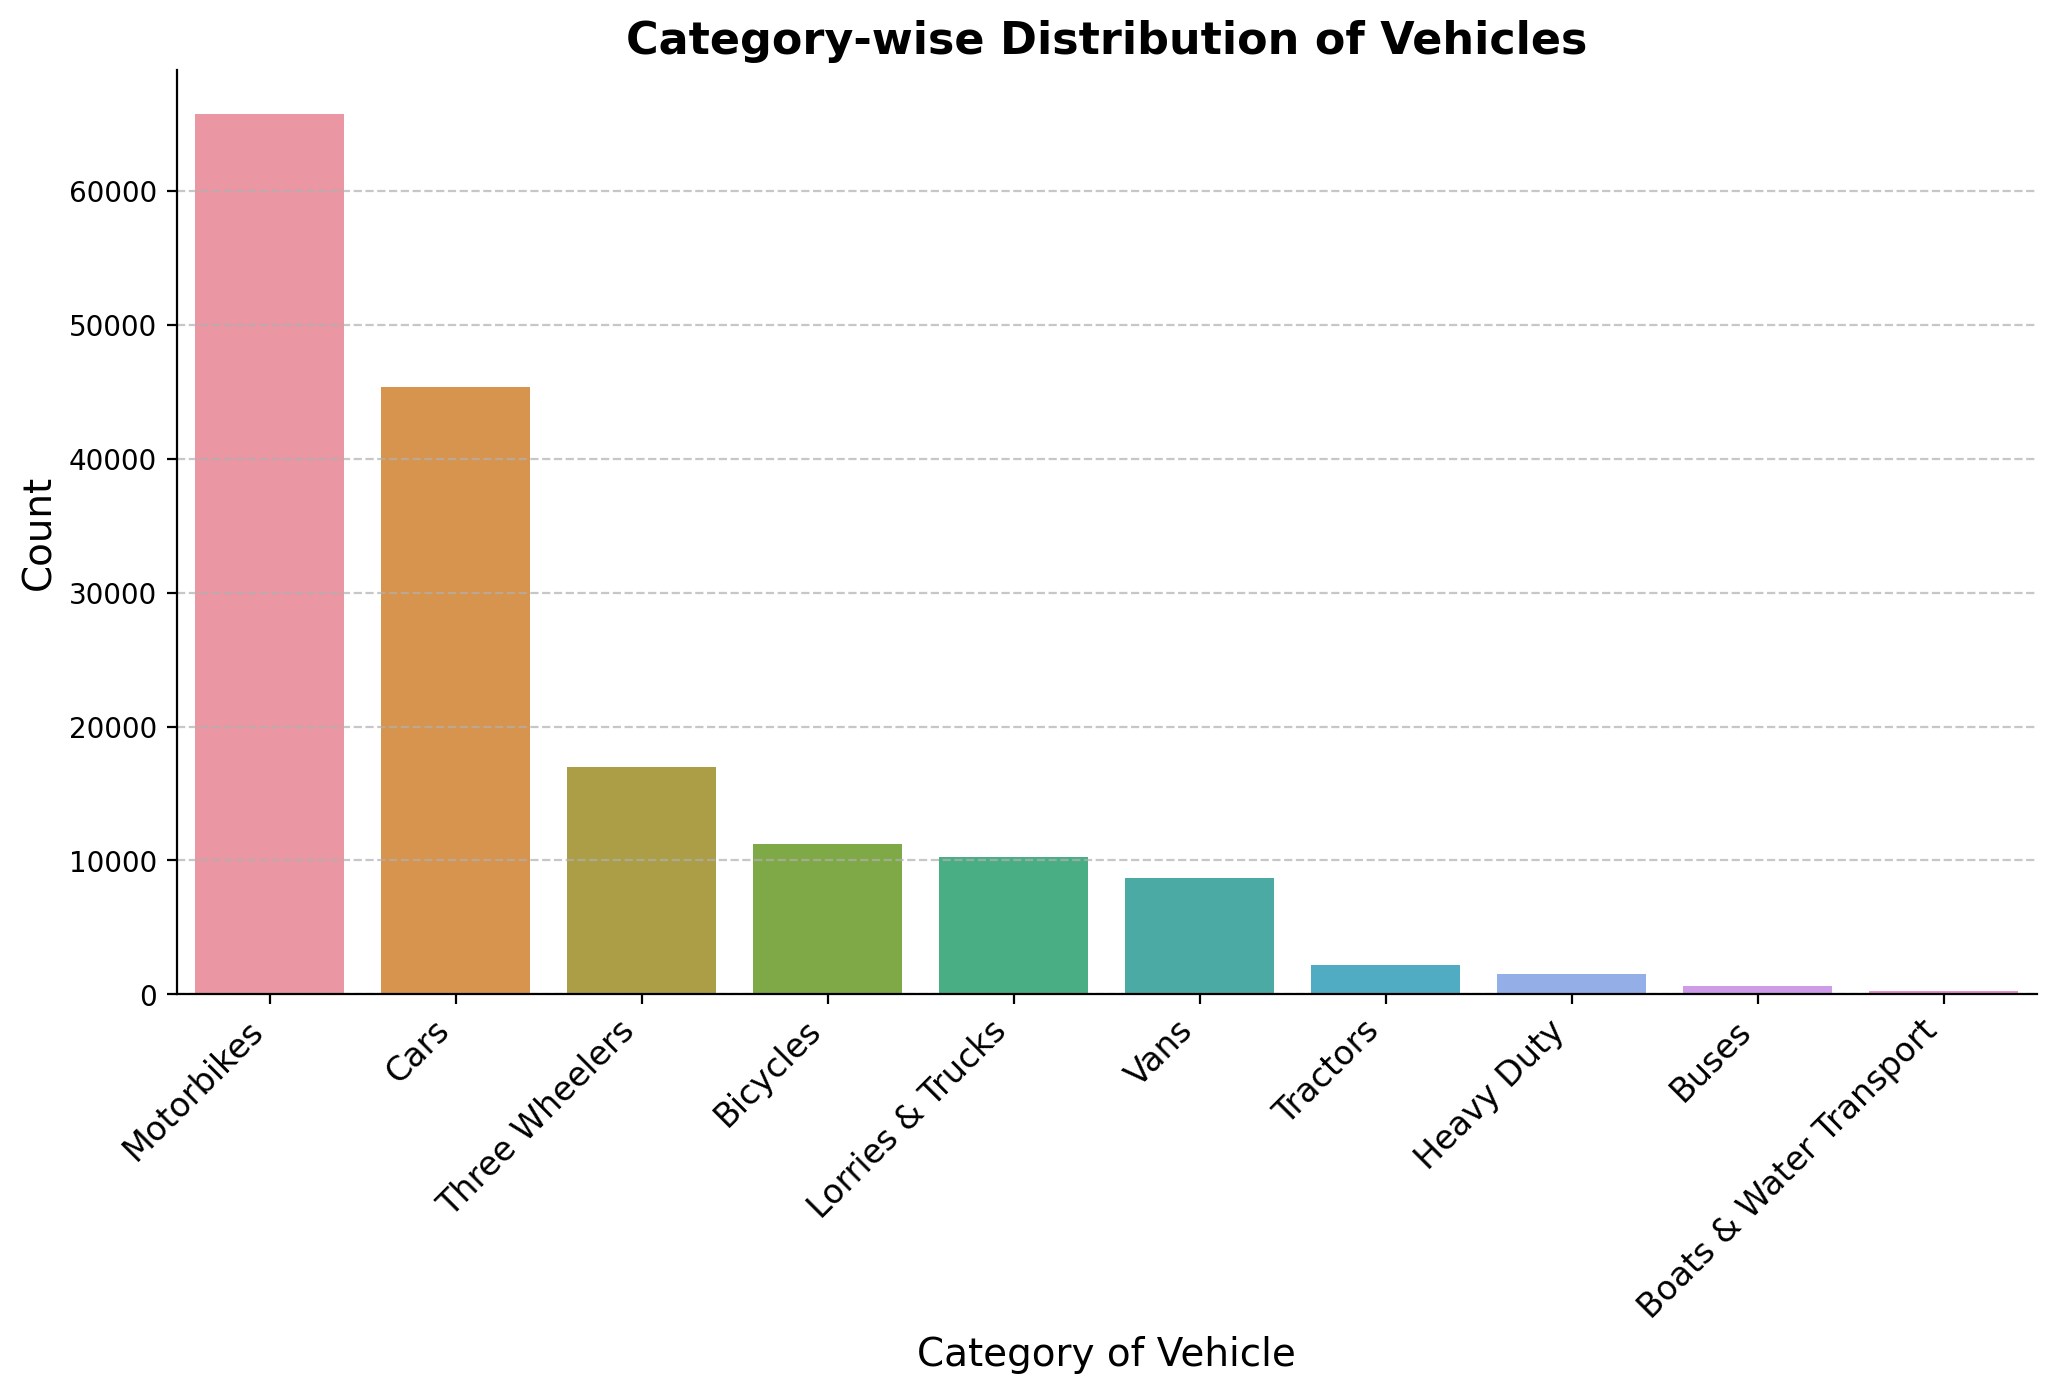

In [176]:

plt.figure(figsize=(12, 6), dpi=200)
sns.countplot(x='category', data=df2, order=df2['category'].value_counts().index)
plt.title("Category-wise Distribution of Vehicles", fontsize=16, fontweight='bold')
plt.xlabel("Category of Vehicle", fontsize=14)
plt.ylabel("Count", fontsize=14)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)
# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()

## From the above plot we got an idea about data distribution according to its category and we can observe we have a maximum number od vehicles that are motorbikes

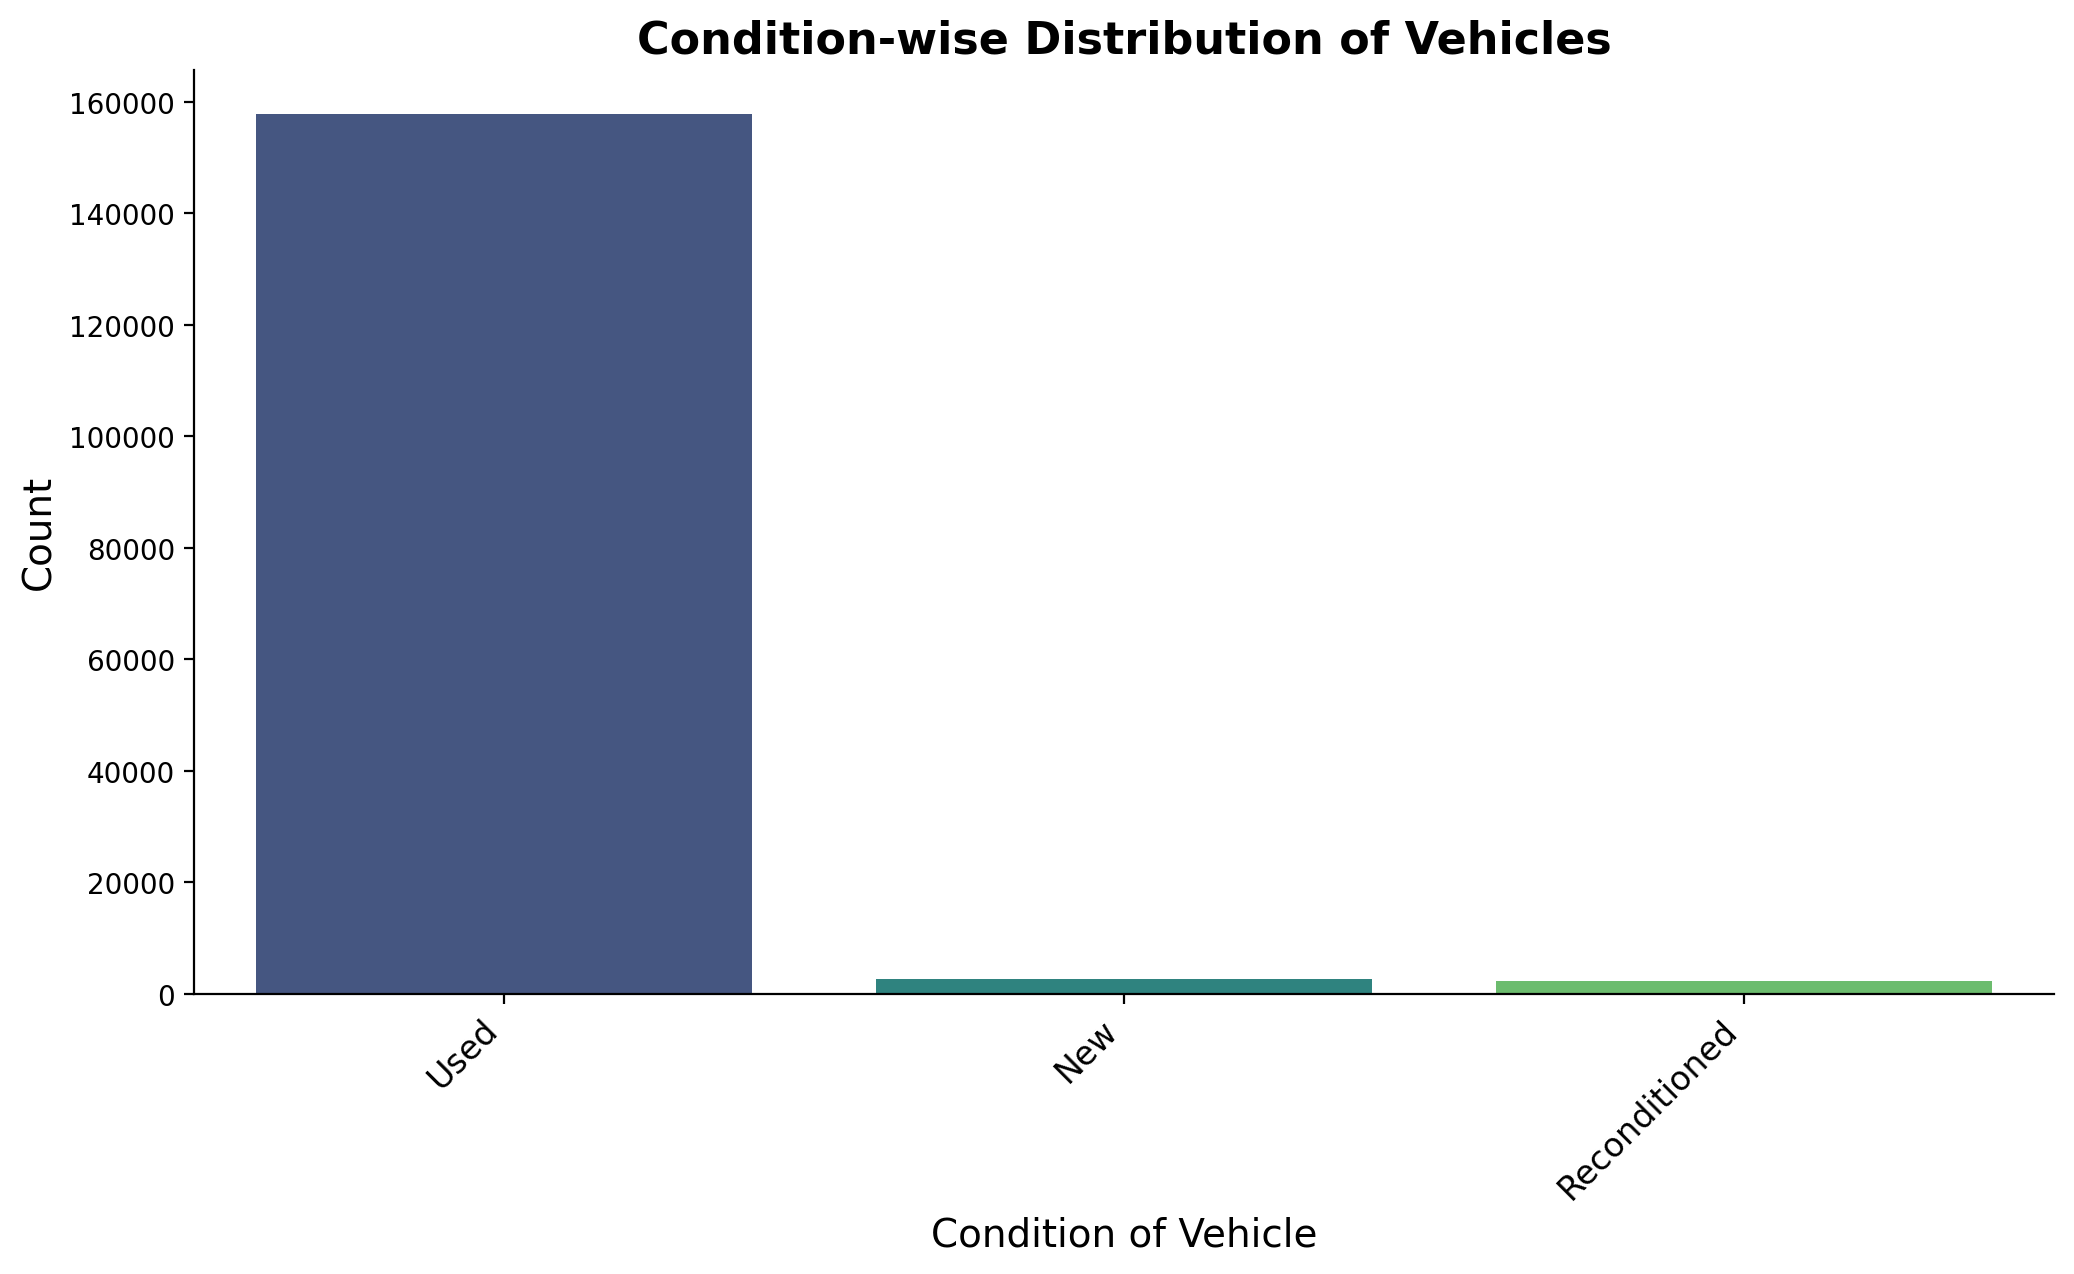

In [178]:
plt.figure(figsize=(12, 6), dpi=200)
custom_palette = sns.color_palette("viridis", n_colors=len(df2['Condition'].unique()))
sns.set_palette(custom_palette)
sns.countplot(x='Condition', data=df2, order=df2['Condition'].value_counts().index)
plt.title("Condition-wise Distribution of Vehicles", fontsize=16, fontweight='bold')
plt.xlabel("Condition of Vehicle", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
sns.despine()
plt.show()

## from the above graph we can observe the maximum vehicles are used vehicles 

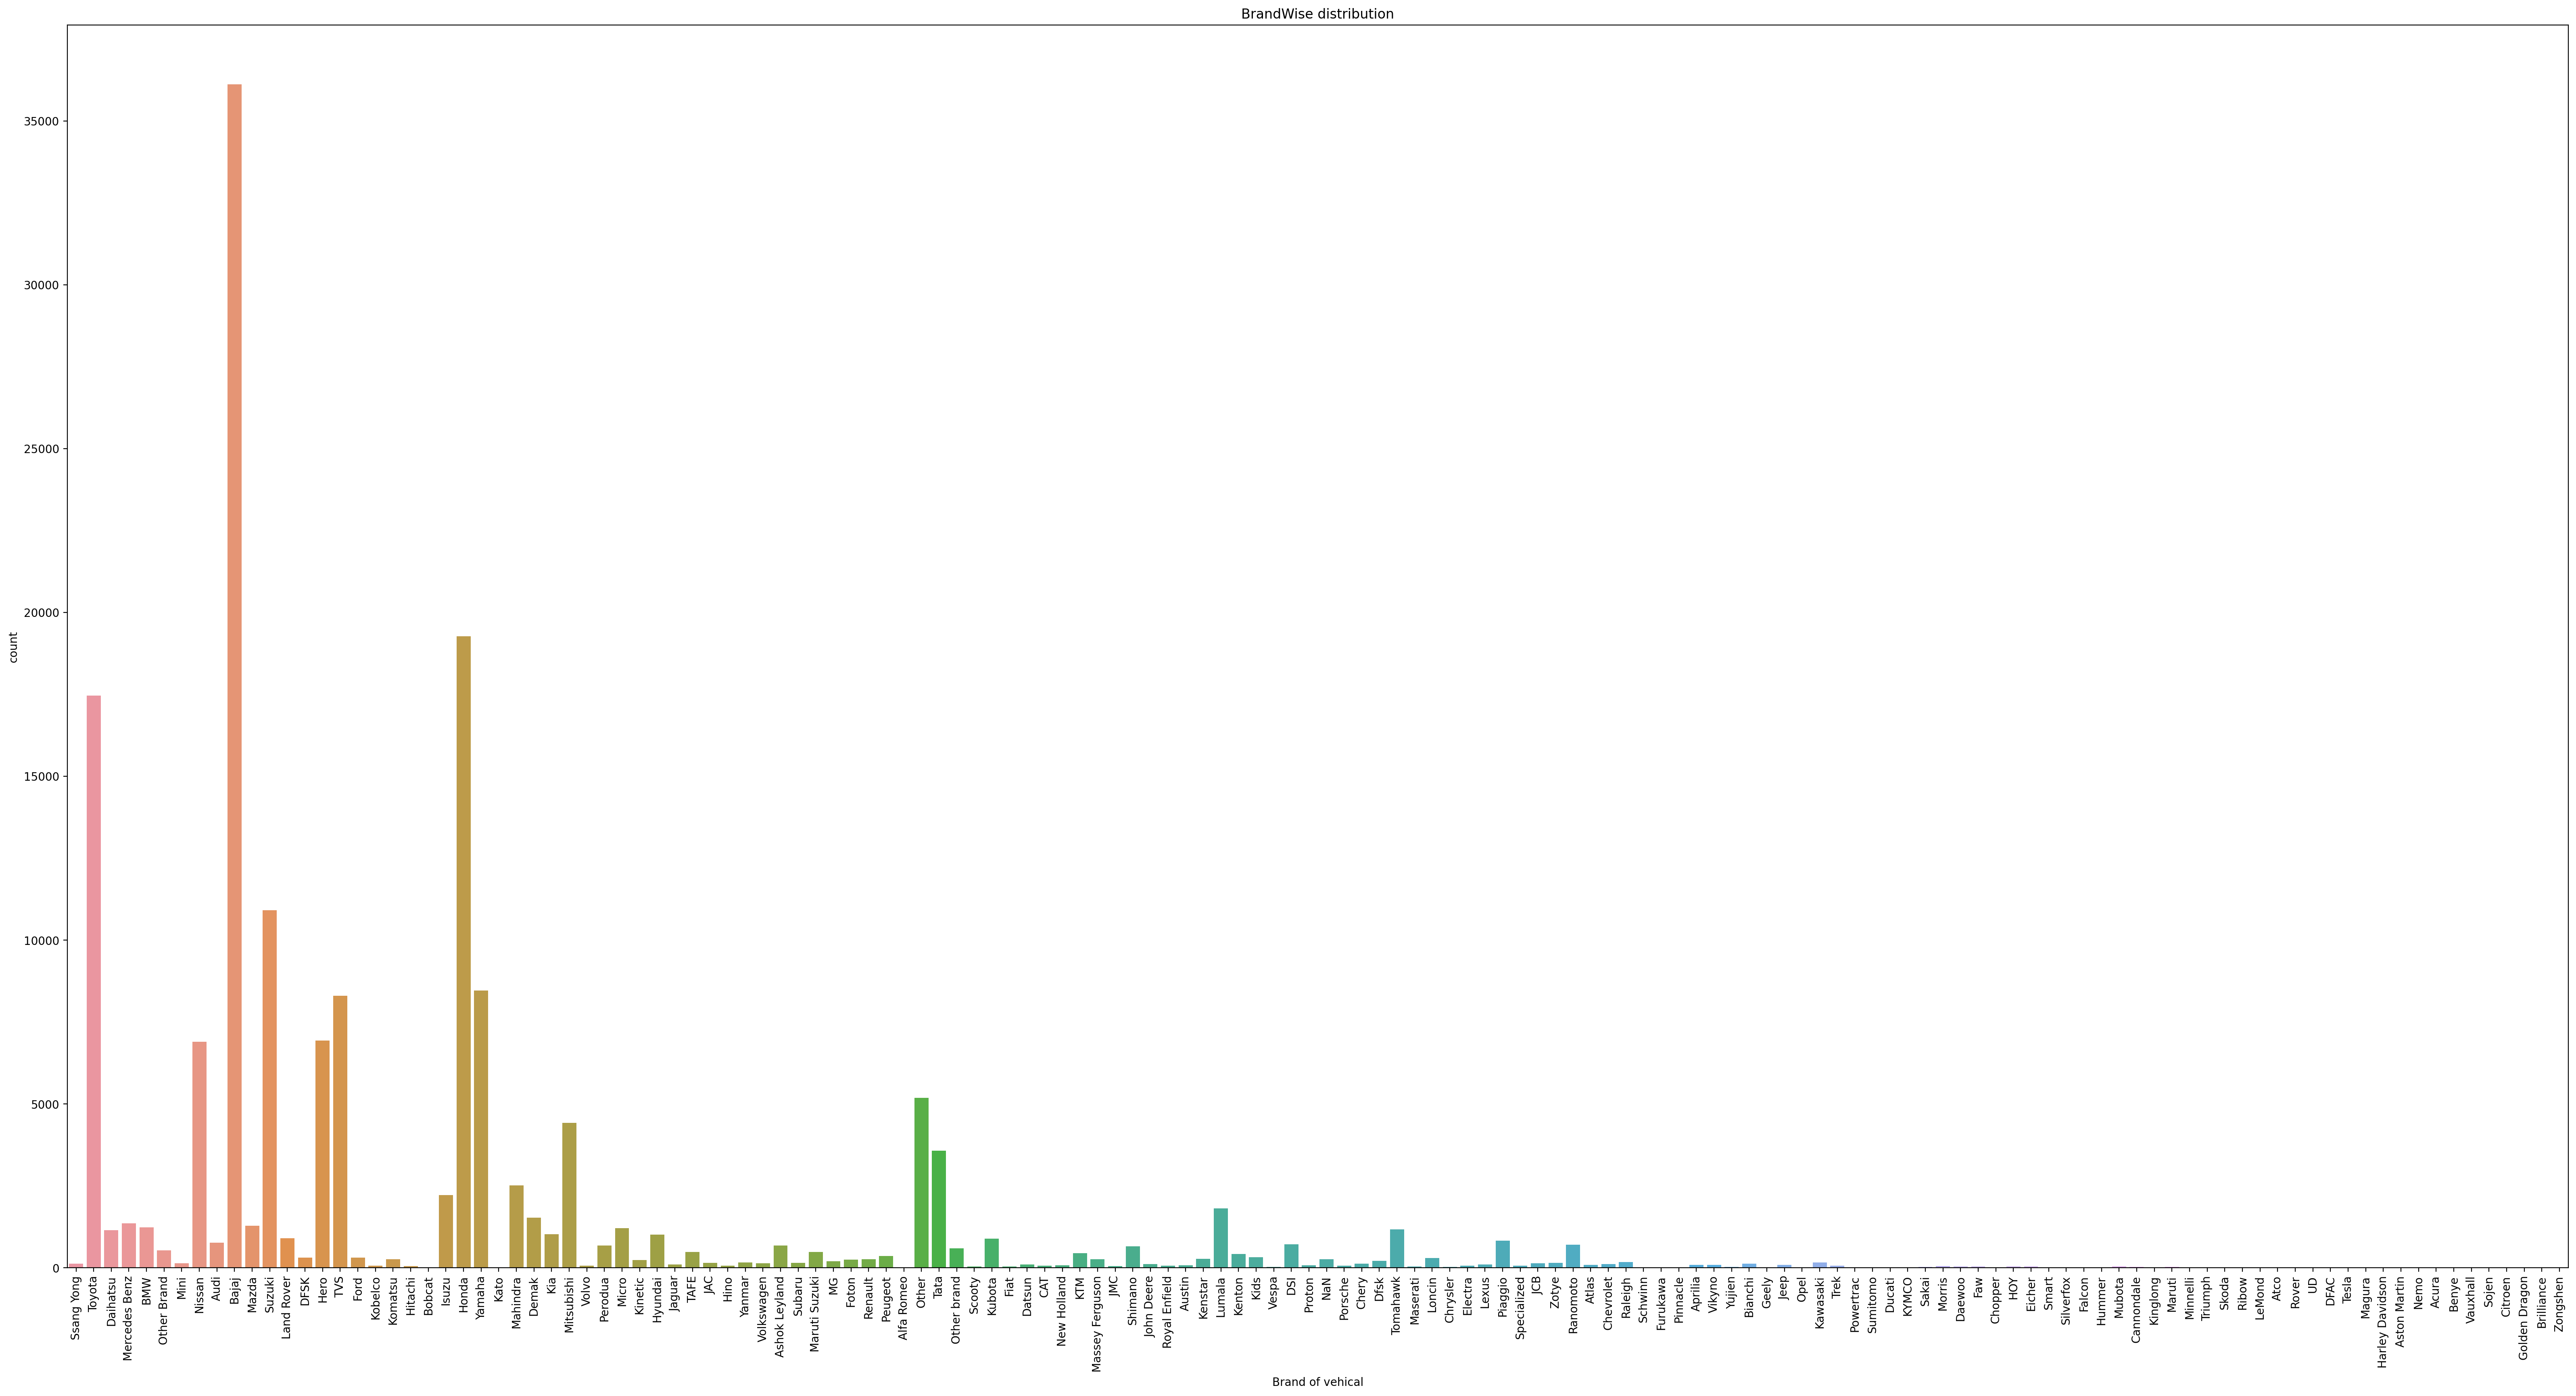

In [179]:
plt.figure(figsize=(40,20),dpi=200)
sns.countplot(x='Brand',data=df2)
plt.title("BrandWise distribution")
plt.xlabel("Brand of vehical")
plt.ylabel("count")
plt.xticks(rotation=90) 
plt.show()

In [180]:
df2.dtypes


price                   float64
category                 object
is_delivery_free           bool
is_doorstep_delivery       bool
is_dsd_applicable          bool
is_member                object
is_authorized_dealer     object
is_featured_member       object
is_verified                bool
membership_level         object
Condition                object
Brand                    object
Mileage                  object
Model                    object
dtype: object

In [181]:
df2['Mileage'].head()

31            0 km
1349      9,000 km
1701     24,000 km
1702     55,000 km
1917    137,000 km
Name: Mileage, dtype: object

In [182]:
df2['Mileage'] = df2['Mileage'].str.replace(' km', '').str.replace(',', '')     
# in mileage we have values with km so we change km to ''

In [183]:
df2['Mileage']=df2['Mileage'].astype(float)   # converted mileage column to float

In [188]:
# dropped unnecessary columns
df3=df2.drop(['is_delivery_free','is_doorstep_delivery','is_dsd_applicable','is_member','is_authorized_dealer','is_featured_member','is_verified','membership_level'],axis=1)

In [189]:
s=df3['Mileage'].median()  #we get median of mileage we dot

In [190]:
df3.head()

,price,category,Condition,Brand,Mileage,Model
31,22000000.0,Cars,New,Ssang Yong,0.0,Rexton
1349,14500000.0,Cars,Reconditioned,Toyota,9000.0,CHR
1701,10500000.0,Cars,Reconditioned,Toyota,24000.0,Axio
1702,6500000.0,Cars,Reconditioned,Daihatsu,55000.0,Atrai Wagon
1917,11500000.0,Cars,Used,Mercedes Benz,137000.0,C180


In [191]:
df3['Mileage']=df3['Mileage'].fillna(s)   # we replace null values with median

In [193]:
df3.isnull().sum()  #then we check all null values again

price        0
category     0
Condition    0
Brand        0
Mileage      0
Model        0
dtype: int64

In [194]:
df3=df3.dropna() # we dropped null values

In [116]:
df3=pd.get_dummies(df3,columns=['category','Condition','Brand','Model'],drop_first=False).astype(int)   
# in this we did encoding of data of categorical data 

In [117]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df3[['price']]=scaler.fit_transform(df3[['price']])  # we scale our target column

In [118]:
df3.head()

,price,Mileage,category_Bicycles,category_Boats & Water Transport,category_Buses,category_Cars,category_Heavy Duty,category_Lorries & Trucks,category_Motorbikes,category_Three Wheelers,...,Model_Zest,Model_Zoomer,Model_e-Golf,Model_e-NV200,Model_e2o,Model_eK Space,Model_eK Wagon,Model_i3,Model_i40,Model_i8
31,2.188633,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1349,1.323831,9000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1701,0.862604,24000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1702,0.401376,55000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1917,0.977911,137000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162821 entries, 31 to 258887
Columns: 1083 entries, price to Model_i8
dtypes: float64(1), int32(1082)
memory usage: 674.5 MB


In [120]:
df3.describe()

,price,Mileage,category_Bicycles,category_Boats & Water Transport,category_Buses,category_Cars,category_Heavy Duty,category_Lorries & Trucks,category_Motorbikes,category_Three Wheelers,...,Model_Zest,Model_Zoomer,Model_e-Golf,Model_e-NV200,Model_e2o,Model_eK Space,Model_eK Wagon,Model_i3,Model_i40,Model_i8
count,1.628210e+05,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000,...,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000,162821.000000
mean,-9.077016e-18,81679.536761,0.068849,0.001585,0.003648,0.278631,0.009464,0.063204,0.403615,0.104163,...,0.000123,0.000227,0.000006,0.000061,0.000006,0.000006,0.000233,0.000141,0.000006,0.000233
std,1.000003e+00,88045.500378,0.253197,0.039775,0.060290,0.448327,0.096824,0.243331,0.490623,0.305473,...,0.011082,0.015073,0.002478,0.007837,0.002478,0.002478,0.015275,0.011884,0.002478,0.015275
min,-3.481191e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.192925e-01,33000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.685574e-01,55000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.219474e-02,98000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.279596e+02,1000000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
x=df3.iloc[:,1:]
y=df3.iloc[:,0] # We separated our target variable and all data

In [122]:
y

31        2.188633
1349      1.323831
1701      0.862604
1702      0.401376
1917      0.977911
            ...   
258881    1.149141
258883   -0.229353
258884    0.061220
258886    0.487856
258887   -0.332553
Name: price, Length: 162821, dtype: float64

In [123]:
from sklearn.model_selection import train_test_split   # imported train_test_split

In [124]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)  # we splited data 

## LINEAR REGRESSION 

In [125]:
from sklearn.linear_model import LinearRegression  # First we are going to apply multiple regression so we imported LinearRegression

In [126]:
regressor=LinearRegression()   

In [127]:
modd=regressor.fit(x_train,y_train)  # trained our model on trained data

In [128]:
y_pred=modd.predict(x_test) # predicted our data 

In [129]:
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,mean_absolute_error  # imported necessary lib 

In [130]:
r2_score(y_pred,y_test)   # calculated r-squared value then we got 0.8273746018043537

-5.69393984215516e-05

In [131]:
mse = mean_squared_error(y_test, y_pred)
print(f"Regression Mean Squared Error: {mse}")    # mean squared error is 0.11978426515470153

Regression Mean Squared Error: 6089.726364344298


In [132]:
mean_absolute_error(y_pred,y_test)   # mean absolute error is 0.07480647352217129

0.9219292994278907

## DECISION TREE 

In [133]:
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
d_regressor=DecisionTreeRegressor()       # now we are going to apply Decision tree

In [134]:
# decision tree

In [135]:
model=d_regressor.fit(x_train,y_train)  # trained our model 

In [136]:
y_pred=model.predict(x_test)   # calculated predicted values

In [137]:
print(f"Accuracy : {r2_score(y_pred,y_test)}")   # calculated r-squared value then we got 0.765463027104214

Accuracy : 0.7659721937425941


In [138]:
mse = mean_squared_error(y_test, y_pred)
print(f"Decison tree Mean Squared Error : {mse}")    # mean squared error is  0.1354066211808399

Decison tree Mean Squared Error : 0.13527057490306799


## RANDOM FOREST 

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestRegressor
# imported libraries for random forest

In [140]:
regressor = RandomForestRegressor(n_estimators=20, random_state=42)


In [141]:
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [142]:
y_pred= regressor.predict(x_test)

In [143]:
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Mean Squared Error: {mse}")

Random Forest Mean Squared Error: 0.11978426515470153


In [144]:
print(f"Accuracy : {r2_score(y_pred,y_test)}")   # calculated r-squared value then we got 0.7855776632089642

Accuracy : 0.7855776632089642
